Your final project will require you to leverage several of the techniques we have discussed throughout the duration of this course.  The project scope will require that you use an existing dataset to predict the likelihood of loan default using a publicly available dataset on loan defaults.  The original dataset comes from Lending Club (https://www.lendingclub.com/).  The dataset contains all loans approved from 2007 to Q42018.  Please review the data dictionary for a detailed explanation of all of the variables included in the dataset.  

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("lending_club.csv")

In [5]:
data.head()

,Unnamed: 0,loan_status,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc
0,133423,Fully Paid,125000.0,20.81,0.0,675.0,679.0,0.0,24.0,15.0,23337.0,58.9,23.0
1,557225,Late (31-120 days),23500.0,23.95,0.0,665.0,669.0,0.0,33.0,5.0,4009.0,35.5,11.0
2,80694,Current,63000.0,8.72,0.0,745.0,749.0,1.0,NaN,6.0,3045.0,20.7,10.0
3,651321,Fully Paid,40000.0,31.09,1.0,680.0,684.0,1.0,13.0,14.0,24950.0,53.8,26.0
4,150555,Current,90000.0,19.72,1.0,705.0,709.0,3.0,5.0,12.0,12729.0,23.2,26.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104858 entries, 0 to 104857
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              104858 non-null  int64  
 1   loan_status             104855 non-null  object 
 2   annual_inc              104855 non-null  float64
 3   dti                     104774 non-null  float64
 4   delinq_2yrs             104855 non-null  float64
 5   fico_range_low          104855 non-null  float64
 6   fico_range_high         104855 non-null  float64
 7   inq_last_6mths          104855 non-null  float64
 8   mths_since_last_delinq  52258 non-null   float64
 9   open_acc                104855 non-null  float64
 10  revol_bal               104855 non-null  float64
 11  revol_util              104776 non-null  float64
 12  total_acc               104855 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 10.4+ MB


In [9]:
data["Unnamed: 0"].nunique()==data.shape[0]

True

In [11]:
data["loan_status"].unique()

array(['Fully Paid', 'Late (31-120 days)', 'Current', 'Charged Off',
       'Late (16-30 days)', 'In Grace Period', nan, 'Default'],
      dtype=object)

In [13]:
data["loan_status"].value_counts()

loan_status
Fully Paid            48162
Current               42122
Charged Off           12851
Late (31-120 days)     1080
In Grace Period         418
Late (16-30 days)       220
Default                   2
Name: count, dtype: int64

In [15]:
data.isnull().sum()

Unnamed: 0                    0
loan_status                   3
annual_inc                    3
dti                          84
delinq_2yrs                   3
fico_range_low                3
fico_range_high               3
inq_last_6mths                3
mths_since_last_delinq    52600
open_acc                      3
revol_bal                     3
revol_util                   82
total_acc                     3
dtype: int64

In [21]:
data.isnull().mean()

Unnamed: 0                0.000000
loan_status               0.000029
annual_inc                0.000029
dti                       0.000801
delinq_2yrs               0.000029
fico_range_low            0.000029
fico_range_high           0.000029
inq_last_6mths            0.000029
mths_since_last_delinq    0.501631
open_acc                  0.000029
revol_bal                 0.000029
revol_util                0.000782
total_acc                 0.000029
dtype: float64

In [27]:
sorted(data["mths_since_last_delinq"].unique().tolist())

[0.0,
 1.0,
 24.0,
 33.0,
 nan,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 125.0,
 129.0,
 135.0,
 138.0,
 145.0,
 152.0,
 158.0]

In [37]:

for type_of_loan in data.loan_status.unique().tolist():
    print(type_of_loan)
    print(data.loc[data.loan_status==type_of_loan].isnull().sum())
    print(data.loc[data.loan_status==type_of_loan].shape[0])
    print("*" * 100)

Fully Paid
Unnamed: 0                    0
loan_status                   0
annual_inc                    0
dti                          18
delinq_2yrs                   0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
mths_since_last_delinq    23636
open_acc                      0
revol_bal                     0
revol_util                   32
total_acc                     0
dtype: int64
48162
****************************************************************************************************
Late (31-120 days)
Unnamed: 0                  0
loan_status                 0
annual_inc                  0
dti                         1
delinq_2yrs                 0
fico_range_low              0
fico_range_high             0
inq_last_6mths              0
mths_since_last_delinq    491
open_acc                    0
revol_bal                   0
revol_util                  1
total_acc                   0
dtype: int64
1080
**************************

In [43]:
remove_unreliable_variables = ["mths_since_last_delinq"]
# Not a reliable variable as the variable has more than 50 percent null values in each case of loan status, which doesn't provide any relation to be
# able to replace the missing values with any other value.

In [41]:
data = data.drop(remove_unreliable_variables,axis=1)

In [45]:
data.head()

,Unnamed: 0,loan_status,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc
0,133423,Fully Paid,125000.0,20.81,0.0,675.0,679.0,0.0,15.0,23337.0,58.9,23.0
1,557225,Late (31-120 days),23500.0,23.95,0.0,665.0,669.0,0.0,5.0,4009.0,35.5,11.0
2,80694,Current,63000.0,8.72,0.0,745.0,749.0,1.0,6.0,3045.0,20.7,10.0
3,651321,Fully Paid,40000.0,31.09,1.0,680.0,684.0,1.0,14.0,24950.0,53.8,26.0
4,150555,Current,90000.0,19.72,1.0,705.0,709.0,3.0,12.0,12729.0,23.2,26.0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104858 entries, 0 to 104857
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       104858 non-null  int64  
 1   loan_status      104855 non-null  object 
 2   annual_inc       104855 non-null  float64
 3   dti              104774 non-null  float64
 4   delinq_2yrs      104855 non-null  float64
 5   fico_range_low   104855 non-null  float64
 6   fico_range_high  104855 non-null  float64
 7   inq_last_6mths   104855 non-null  float64
 8   open_acc         104855 non-null  float64
 9   revol_bal        104855 non-null  float64
 10  revol_util       104776 non-null  float64
 11  total_acc        104855 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 9.6+ MB


In [53]:
# Drop the null values
# The null values present are less than 0.001% of the data

In [55]:
data = data.dropna()

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104695 entries, 0 to 104857
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       104695 non-null  int64  
 1   loan_status      104695 non-null  object 
 2   annual_inc       104695 non-null  float64
 3   dti              104695 non-null  float64
 4   delinq_2yrs      104695 non-null  float64
 5   fico_range_low   104695 non-null  float64
 6   fico_range_high  104695 non-null  float64
 7   inq_last_6mths   104695 non-null  float64
 8   open_acc         104695 non-null  float64
 9   revol_bal        104695 non-null  float64
 10  revol_util       104695 non-null  float64
 11  total_acc        104695 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 10.4+ MB


In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,104695.0,523963.247280,301989.610957,1.0,263084.50,524498.00,785189.00,1048570.0
annual_inc,104695.0,77992.219448,68214.662133,0.0,46000.00,65000.00,94000.00,8706582.0
dti,104695.0,19.280909,14.146912,0.0,12.19,18.26,25.12,999.0
delinq_2yrs,104695.0,0.322795,0.919092,0.0,0.00,0.00,0.00,58.0
fico_range_low,104695.0,698.026840,32.915007,660.0,670.00,690.00,715.00,845.0
fico_range_high,104695.0,702.027050,32.915948,664.0,674.00,694.00,719.00,850.0
inq_last_6mths,104695.0,0.522489,0.820516,0.0,0.00,0.00,1.00,6.0
open_acc,104695.0,11.783304,5.752205,1.0,8.00,11.00,15.00,66.0
revol_bal,104695.0,16792.506528,22293.638889,0.0,5952.00,11341.00,20425.50,959754.0
revol_util,104695.0,49.990328,24.619041,0.0,31.30,49.60,68.80,155.3


In [63]:
import matplotlib.pyplot as plt

Unnamed: 0


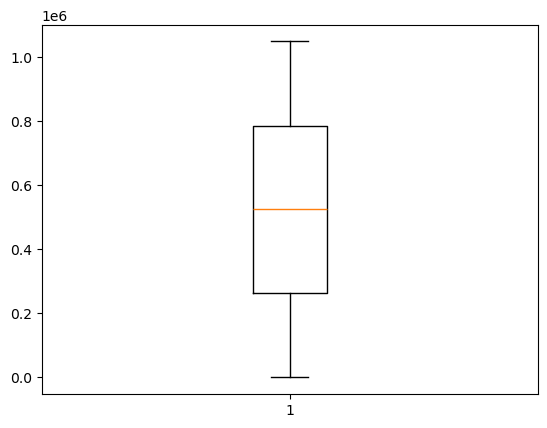

****************************************************************************************************
annual_inc


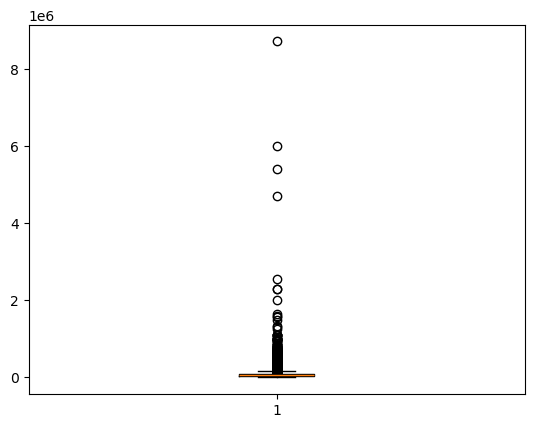

****************************************************************************************************
dti


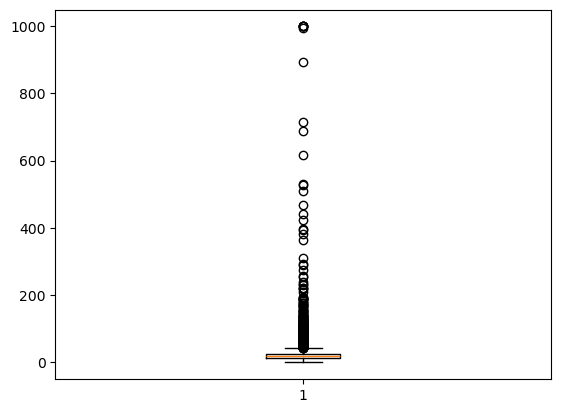

****************************************************************************************************
delinq_2yrs


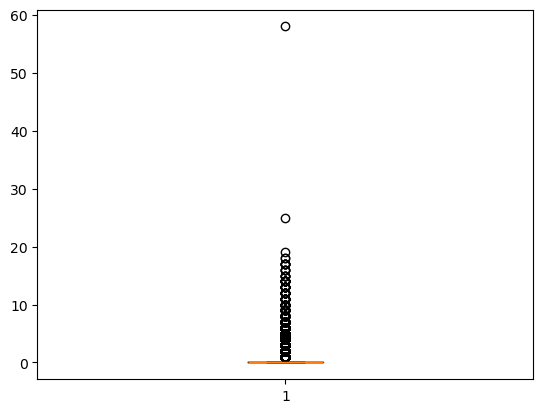

****************************************************************************************************
fico_range_low


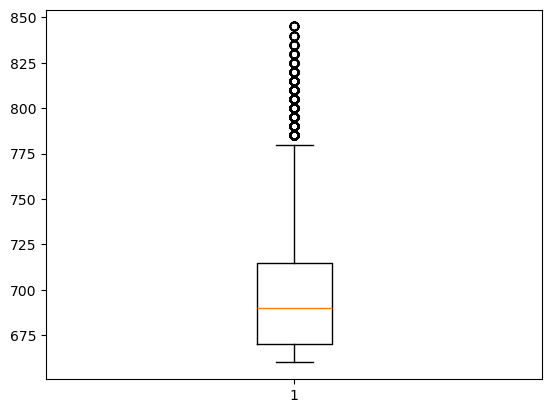

****************************************************************************************************
fico_range_high


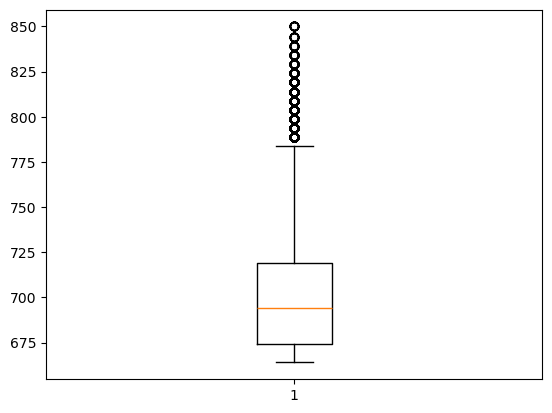

****************************************************************************************************
inq_last_6mths


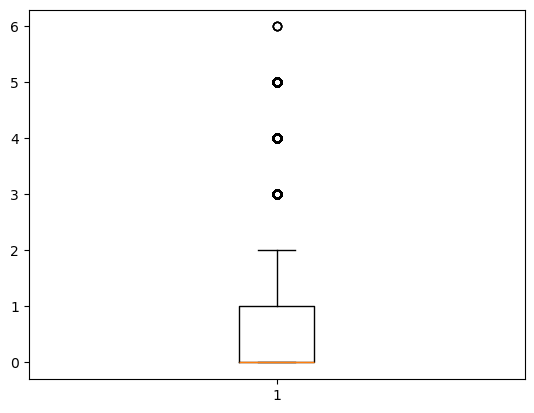

****************************************************************************************************
open_acc


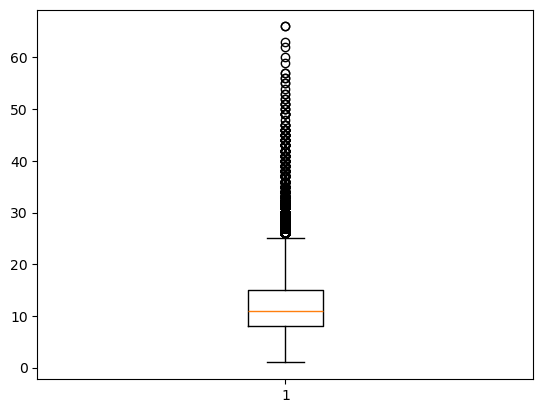

****************************************************************************************************
revol_bal


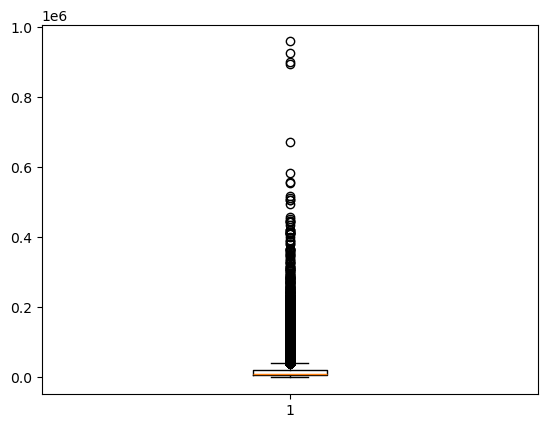

****************************************************************************************************
revol_util


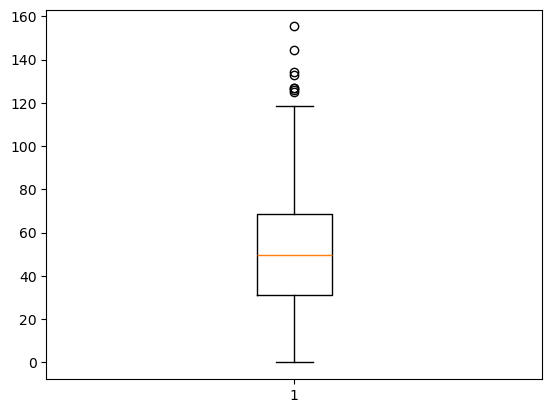

****************************************************************************************************
total_acc


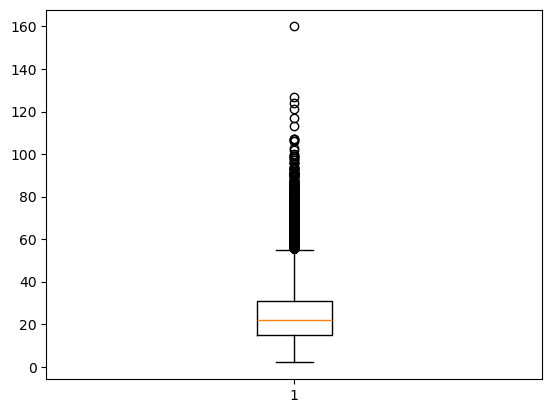

****************************************************************************************************


In [67]:
for col in data.columns:
    if data[col].dtype!="O":
        print(col)
        plt.boxplot(data[col])
        plt.show()
        print("*" * 100)
        

Unnamed: 0


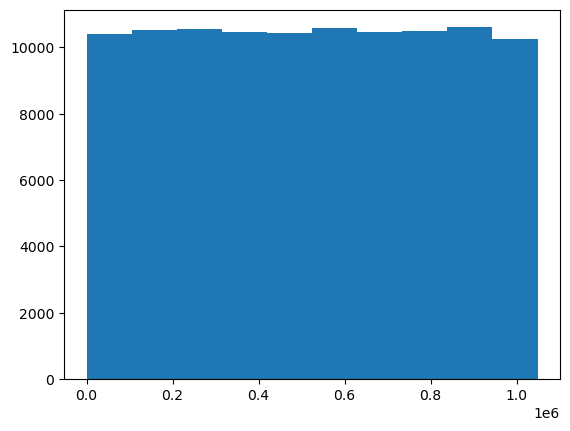

****************************************************************************************************
annual_inc


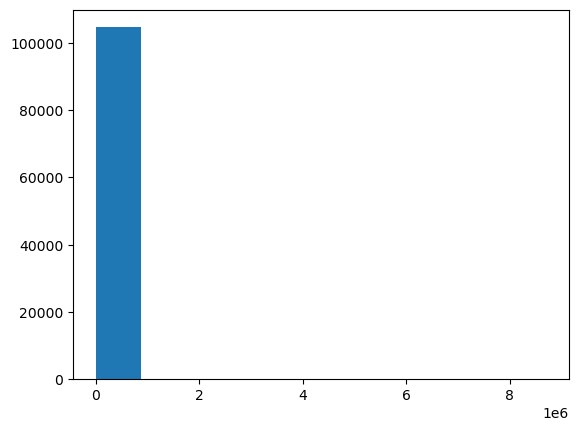

****************************************************************************************************
dti


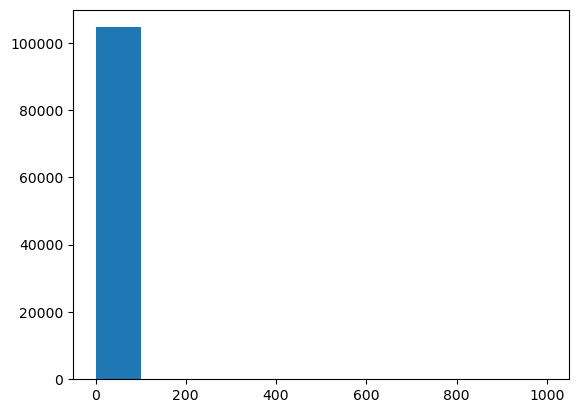

****************************************************************************************************
delinq_2yrs


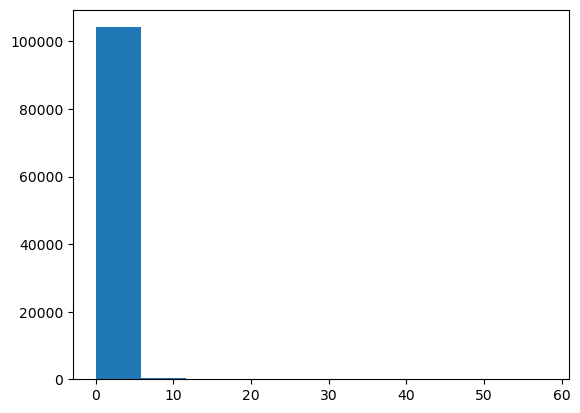

****************************************************************************************************
fico_range_low


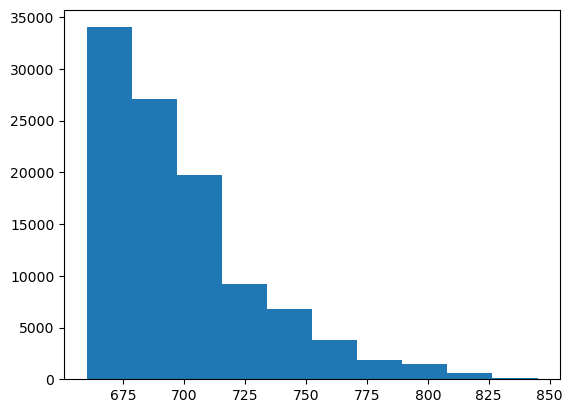

****************************************************************************************************
fico_range_high


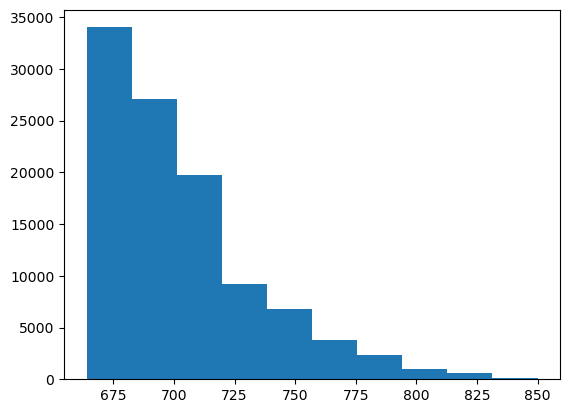

****************************************************************************************************
inq_last_6mths


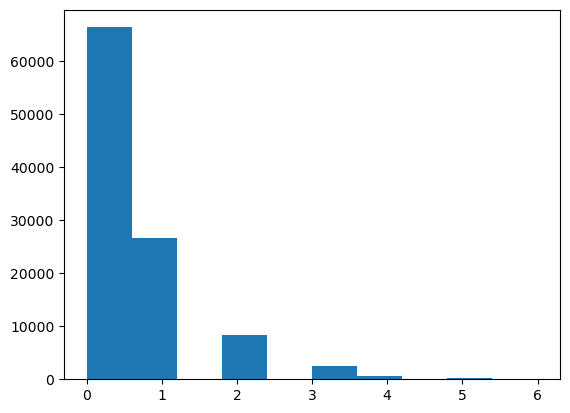

****************************************************************************************************
open_acc


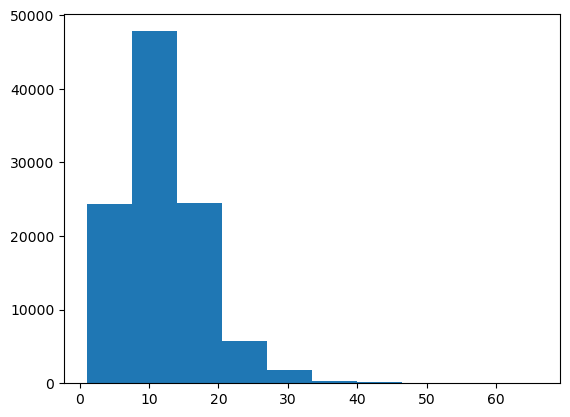

****************************************************************************************************
revol_bal


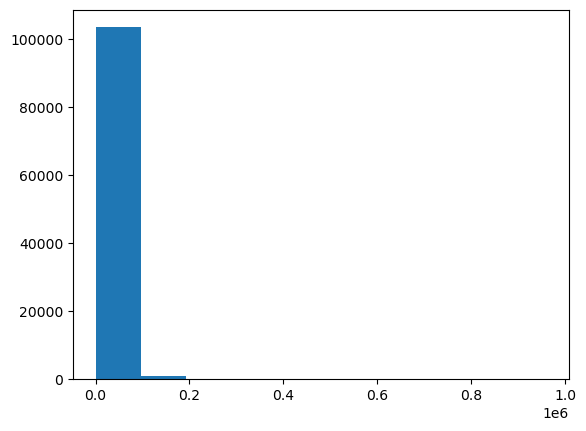

****************************************************************************************************
revol_util


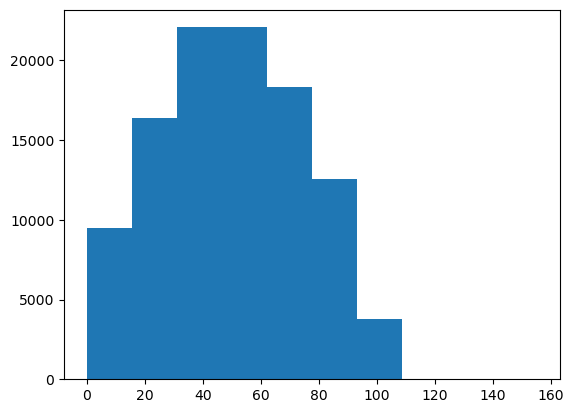

****************************************************************************************************
total_acc


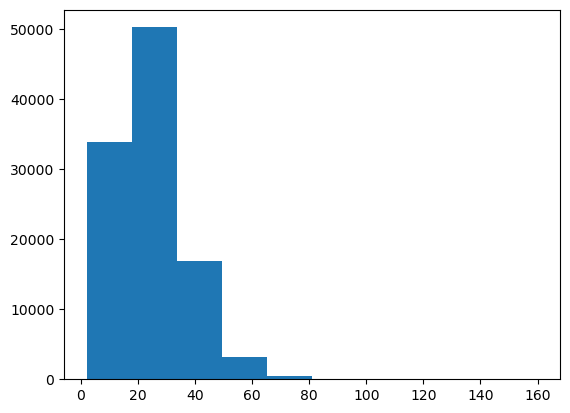

****************************************************************************************************


In [69]:
for col in data.columns:
    if data[col].dtype!="O":
        print(col)
        plt.hist(data[col])
        plt.show()
        print("*"*100)
        

In [71]:
# Bivariate Analysis

In [73]:
import seaborn as sns

Unnamed: 0


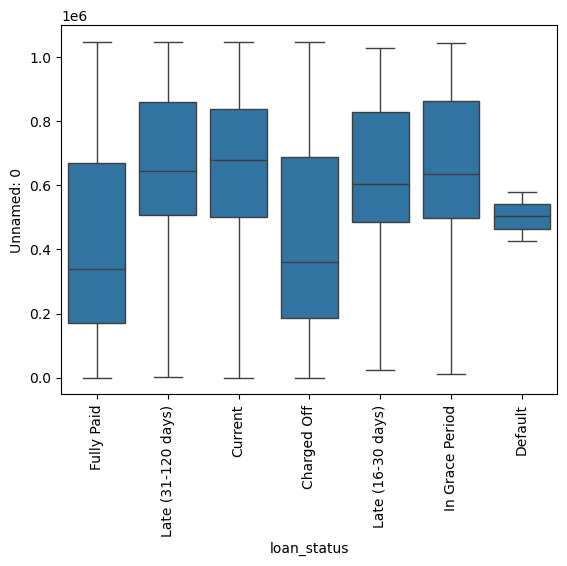

****************************************************************************************************
annual_inc


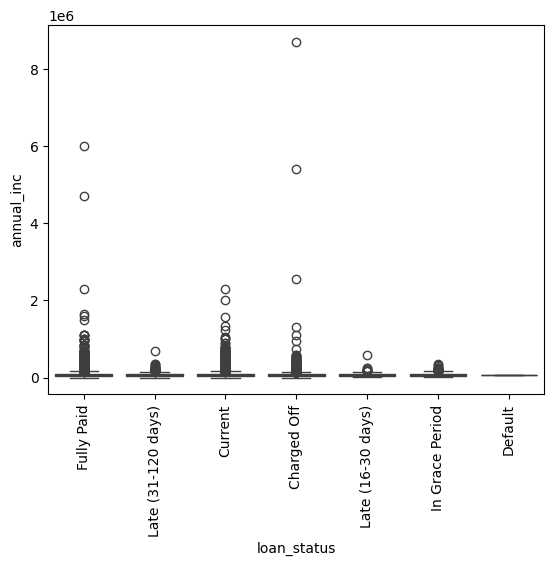

****************************************************************************************************
dti


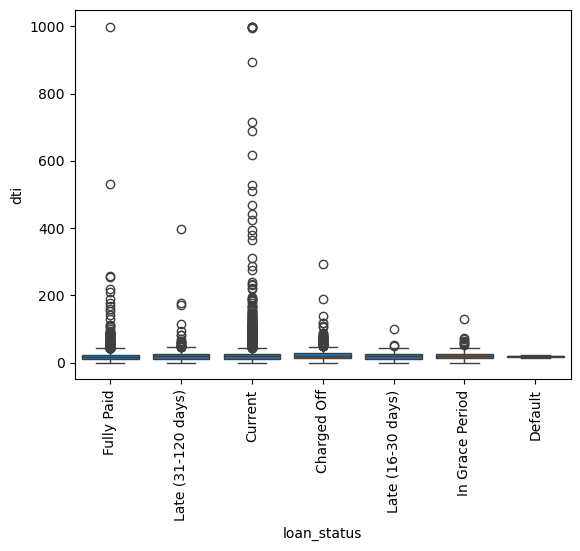

****************************************************************************************************
delinq_2yrs


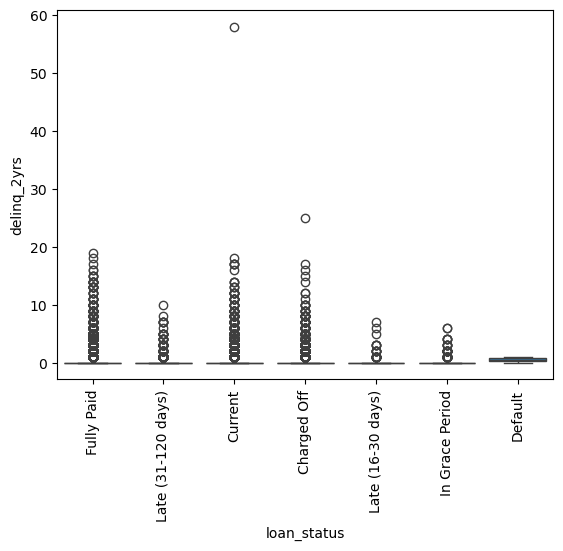

****************************************************************************************************
fico_range_low


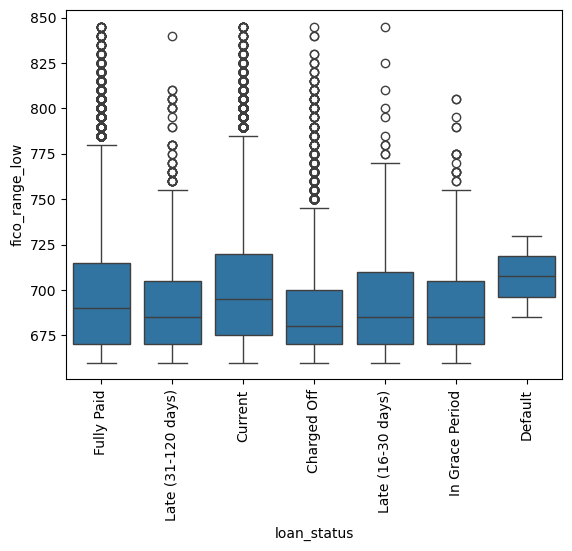

****************************************************************************************************
fico_range_high


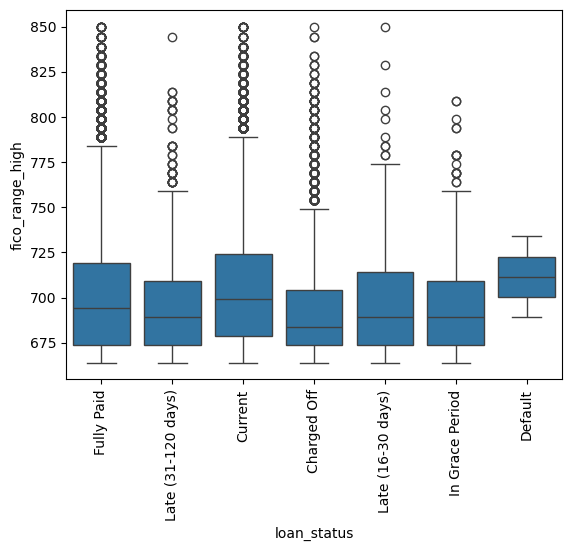

****************************************************************************************************
inq_last_6mths


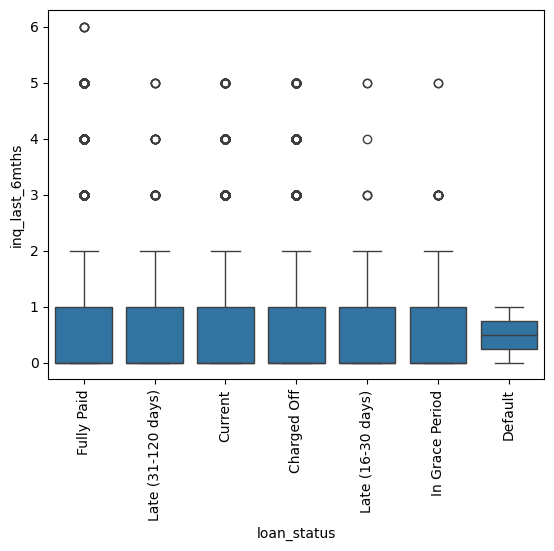

****************************************************************************************************
open_acc


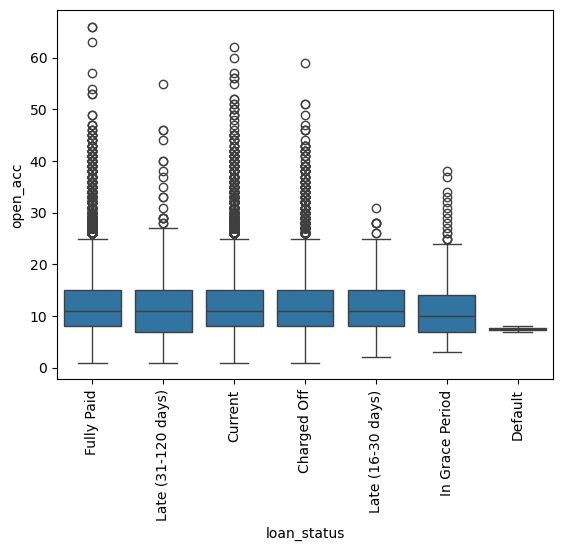

****************************************************************************************************
revol_bal


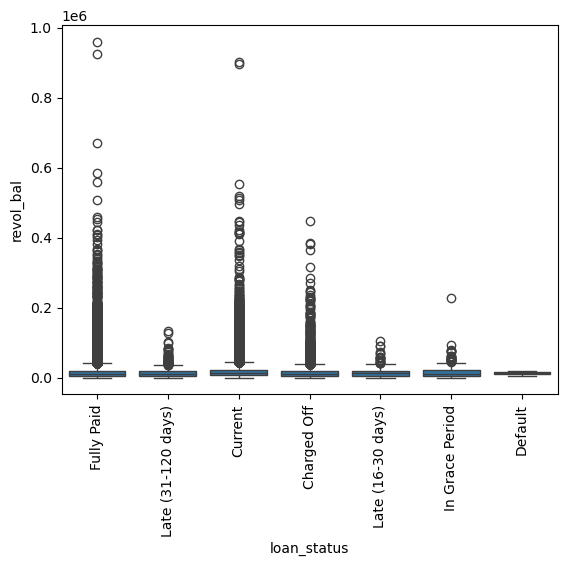

****************************************************************************************************
revol_util


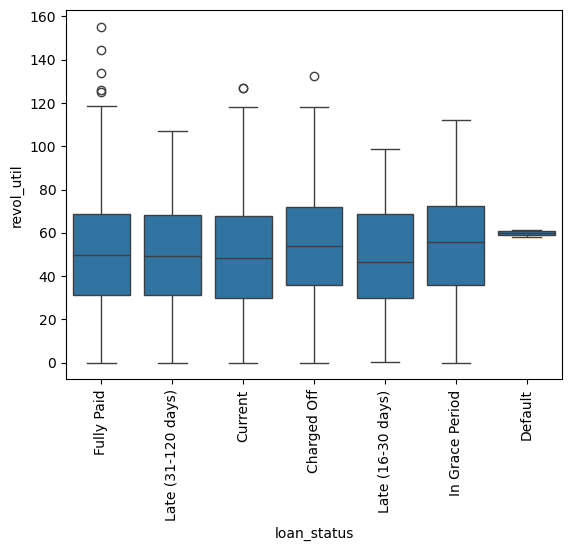

****************************************************************************************************
total_acc


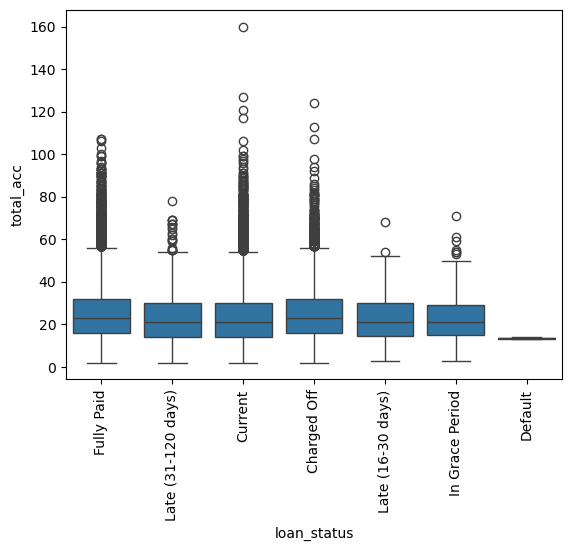

****************************************************************************************************


In [87]:

for col in data.columns:
    if data[col].dtype!="O":
        print(col)
        sns.boxplot(x="loan_status",y=col,data=data)
        plt.xticks(rotation=90)
        plt.show()
         
        print("*" * 100)

In [89]:
# Late vs no Late

Unnamed: 0


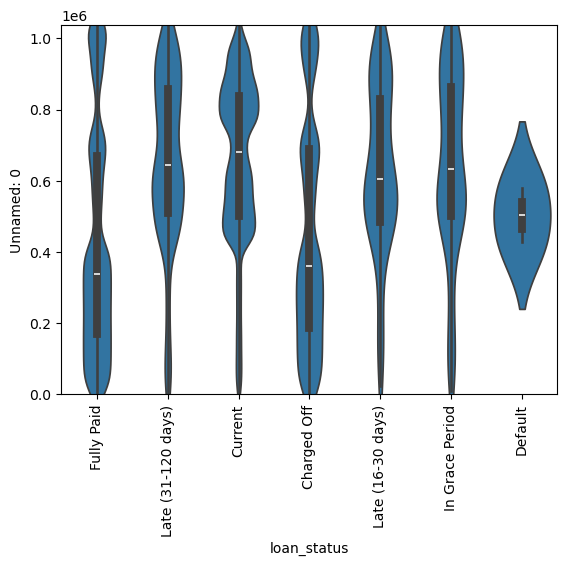

****************************************************************************************************
annual_inc


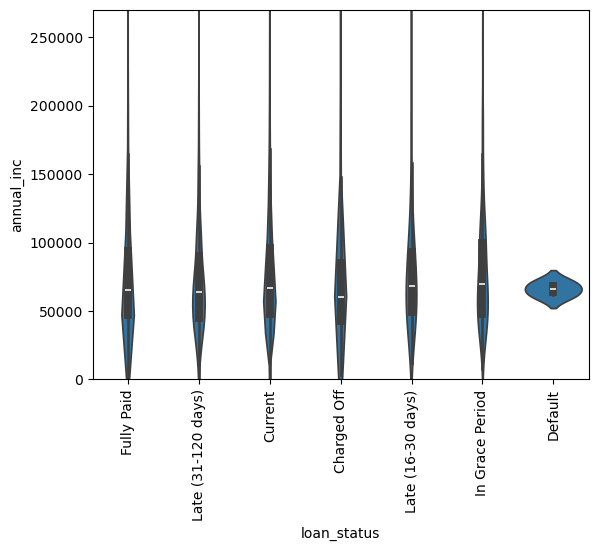

****************************************************************************************************
dti


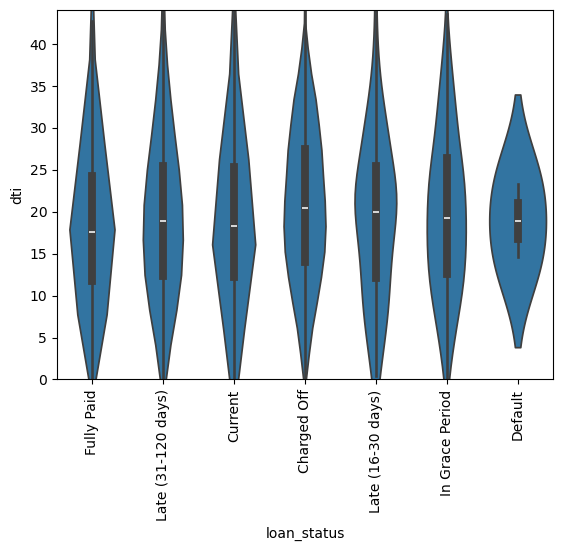

****************************************************************************************************
delinq_2yrs


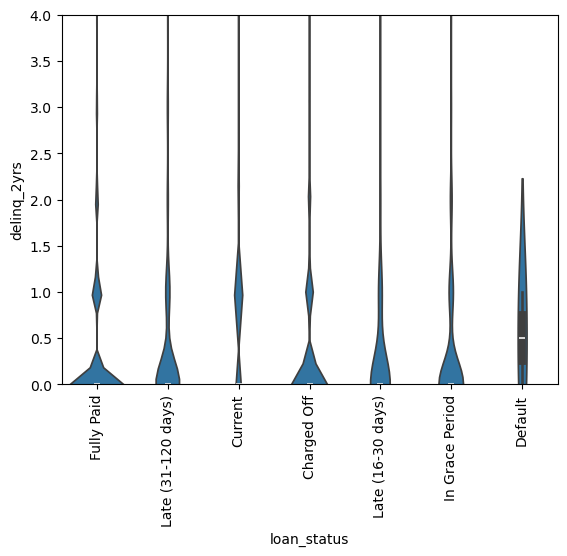

****************************************************************************************************
fico_range_low


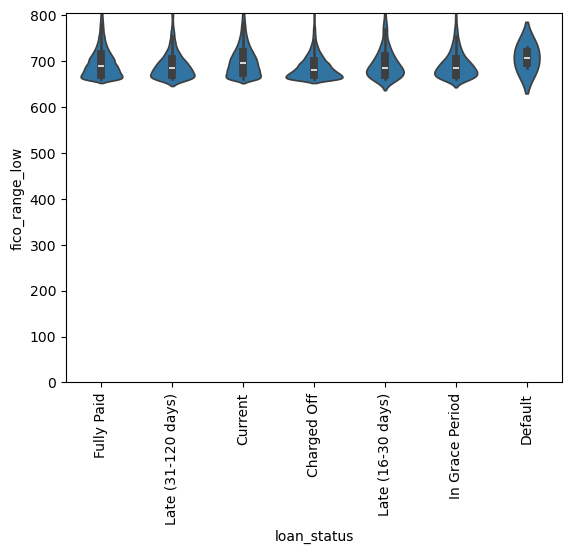

****************************************************************************************************
fico_range_high


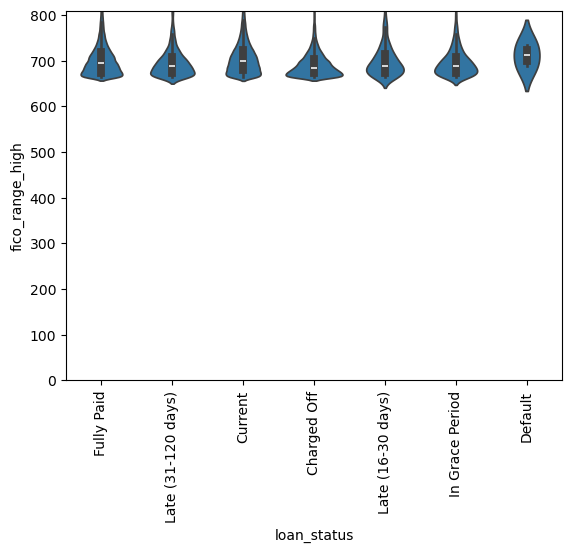

****************************************************************************************************
inq_last_6mths


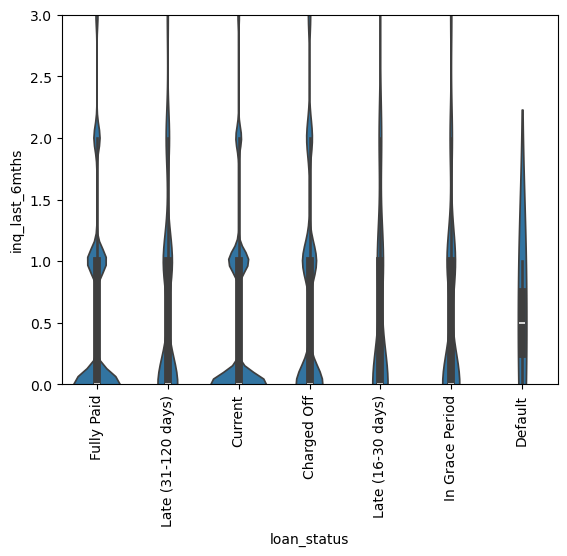

****************************************************************************************************
open_acc


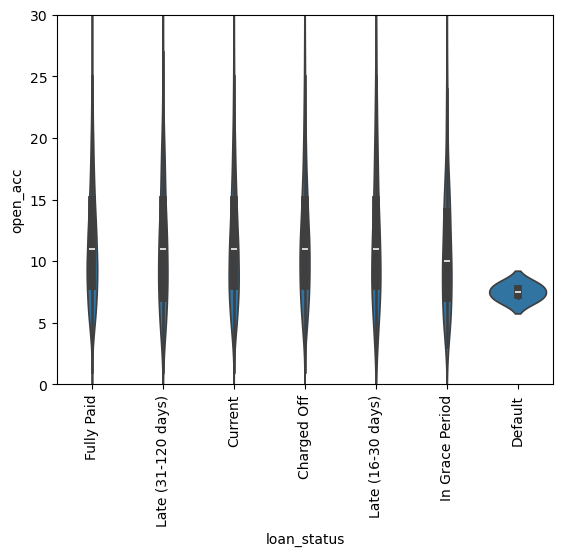

****************************************************************************************************
revol_bal


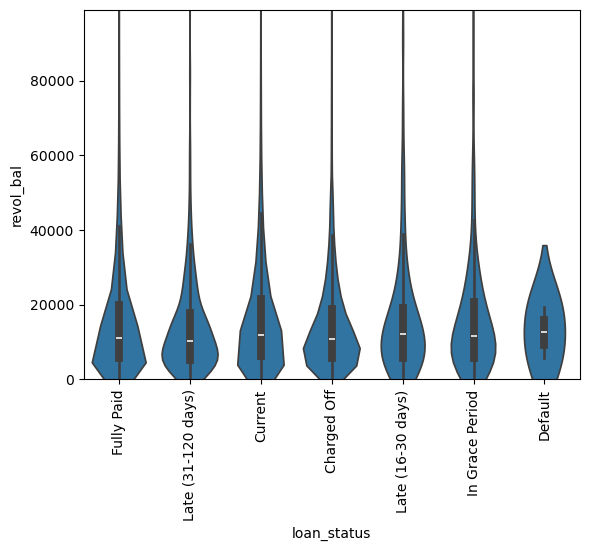

****************************************************************************************************
revol_util


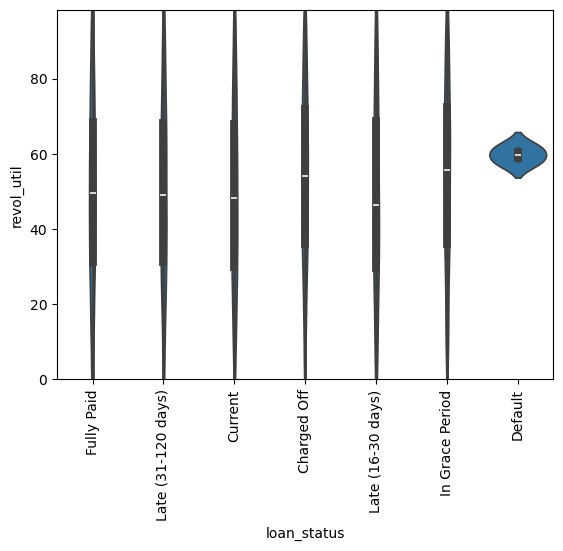

****************************************************************************************************
total_acc


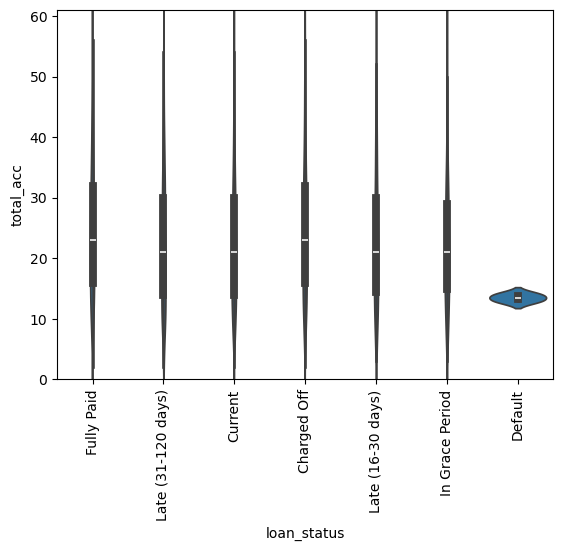

****************************************************************************************************


In [101]:
for col in data.columns:
    if data[col].dtype!="O":
        print(col)
        sns.violinplot(x="loan_status",y=col,data=data)
        plt.xticks(rotation=90)
        ylim1 = 0
        ylim2 = data[col].quantile(0.99)
        plt.ylim(ylim1,ylim2)
        plt.show()
         
        print("*" * 100)

In [107]:
num = [ col for col in data.columns if data[col].dtype!="O"]
cat = [ col for col in data.columns if data[col].dtype=="O"]

In [113]:
num

['Unnamed: 0',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc']

In [115]:
cat


['loan_status']

In [111]:
data[num].corr().T

,Unnamed: 0,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc
Unnamed: 0,1.000000,0.013338,0.002657,-0.012273,0.065049,0.065049,-0.038039,-0.017845,-0.019197,-0.080797,-0.058817
annual_inc,0.013338,1.000000,-0.140536,0.042874,0.058859,0.058857,0.025564,0.157021,0.316696,0.052168,0.189301
dti,0.002657,-0.140536,1.000000,-0.011921,-0.023782,-0.023786,-0.000644,0.184946,0.105048,0.119177,0.153052
delinq_2yrs,-0.012273,0.042874,-0.011921,1.000000,-0.176160,-0.176157,0.032937,0.042107,-0.029897,0.003827,0.114817
fico_range_low,0.065049,0.058859,-0.023782,-0.176160,1.000000,1.000000,-0.108237,0.023412,0.010665,-0.465898,0.012455
fico_range_high,0.065049,0.058857,-0.023786,-0.176157,1.000000,1.000000,-0.108236,0.023409,0.010661,-0.465896,0.012453
inq_last_6mths,-0.038039,0.025564,-0.000644,0.032937,-0.108237,-0.108236,1.000000,0.156840,-0.012276,-0.090907,0.157488
open_acc,-0.017845,0.157021,0.184946,0.042107,0.023412,0.023409,0.156840,1.000000,0.243815,-0.137189,0.724487
revol_bal,-0.019197,0.316696,0.105048,-0.029897,0.010665,0.010661,-0.012276,0.243815,1.000000,0.263157,0.207424
revol_util,-0.080797,0.052168,0.119177,0.003827,-0.465898,-0.465896,-0.090907,-0.137189,0.263157,1.000000,-0.099626


In [117]:
data.loan_status.unique()

array(['Fully Paid', 'Late (31-120 days)', 'Current', 'Charged Off',
       'Late (16-30 days)', 'In Grace Period', 'Default'], dtype=object)

In [229]:
data["loan_status"] = data["loan_status"].apply(lambda x: "Fully Paid" if x=="Current" else x)

In [265]:
data.loan_status.unique()

array(['Fully Paid', 'Late (31-120 days)', 'Charged Off',
       'Late (16-30 days)', 'In Grace Period', 'Default'], dtype=object)

In [401]:
data["loan_status_modified"] = data["loan_status"].apply(lambda x: "Late" if x in ['Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period', 'default', 'Charged Off'] else  "Paid")

In [403]:
drop_columns = ["Unnamed: 0", "loan_status","loan_status_modified"]

In [405]:
X = data.drop(drop_columns,axis=1)
y = data["loan_status_modified"]

In [407]:
from sklearn.model_selection import train_test_split

In [409]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [411]:
from sklearn.tree import DecisionTreeClassifier
#max depth log2 number of features

In [466]:
X.shape

(104695, 10)

In [628]:
model = DecisionTreeClassifier(class_weight="balanced", max_depth=10)

In [630]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10)

In [631]:
train_predictions = model.predict(x_train)

In [632]:
test_predictions = model.predict(x_test)

In [636]:
# confusion matrix

In [638]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

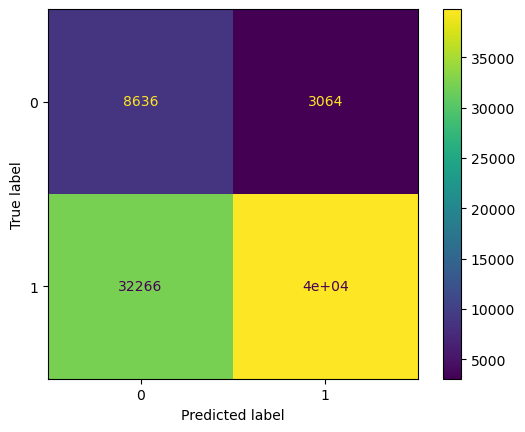

In [640]:
train_cf = confusion_matrix(y_train,train_predictions)
disp = ConfusionMatrixDisplay(train_cf)
disp.plot()

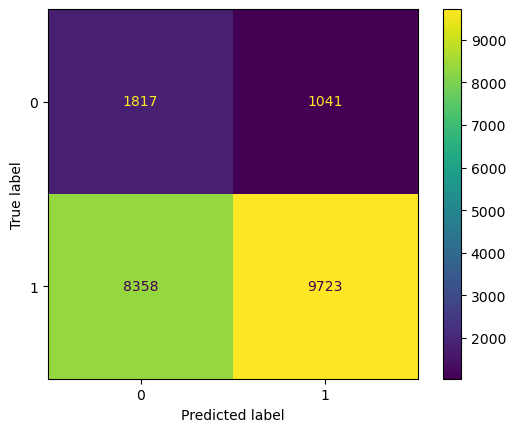

In [641]:
test_cf = confusion_matrix(y_test,test_predictions)
disp = ConfusionMatrixDisplay(test_cf)
disp.plot()

In [642]:
from sklearn.metrics import classification_report

In [644]:
#train cf

In [648]:
print(classification_report(y_train,train_predictions))

              precision    recall  f1-score   support

        Late       0.21      0.74      0.33     11700
        Paid       0.93      0.55      0.69     72056

    accuracy                           0.58     83756
   macro avg       0.57      0.65      0.51     83756
weighted avg       0.83      0.58      0.64     83756



In [649]:
# test cf

In [650]:
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

        Late       0.18      0.64      0.28      2858
        Paid       0.90      0.54      0.67     18081

    accuracy                           0.55     20939
   macro avg       0.54      0.59      0.48     20939
weighted avg       0.80      0.55      0.62     20939



In [668]:
prob_tuned = []
for prob in model.predict_proba(x_test)[:,0]:
    if prob>0.8:
        prob_tuned.append("Paid")
    else:
        prob_tuned.append("Late")
        

In [670]:
print(classification_report(y_test,prob_tuned))

              precision    recall  f1-score   support

        Late       0.14      0.98      0.24      2858
        Paid       0.82      0.01      0.03     18081

    accuracy                           0.15     20939
   macro avg       0.48      0.50      0.13     20939
weighted avg       0.73      0.15      0.06     20939

